In [105]:
#导入第三方包
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import  stats
import scipy.stats.mstats as mst
from statsmodels.graphics.api import qqplot
dir = './data/'
df = pd.read_csv(dir+'week1.csv',engine='python',sep=",")
df['day_of_week']=df['day_of_week'].astype('str')
df.head(10)

,date,day_of_week,cnt,time
0,6,1,3396,20080106
1,12,1,2735,20080112
2,19,1,3903,20080119
3,25,1,3377,20080125
4,32,1,4094,20080201
5,41,1,2377,20080210
6,47,1,1874,20080216
7,53,1,1843,20080222
8,60,1,1933,20080229
9,66,1,1797,20080306


In [106]:
#dateparse = lambda dates: pd.datetime.strptime(time, '%Y/%m/%d')
#data = pd.read_csv('mian.csv', parse_dates='time', index_col='time',date_parser=dateparse)

In [107]:
dta=df['cnt']
df['cha']=df['date'].diff()
df['cha']=df['cha'].fillna(6)
#df['cha']=df['cha'].astype('str')
type(dta)
df.head(10)

,date,day_of_week,cnt,time,cha
0,6,1,3396,20080106,6.0
1,12,1,2735,20080112,6.0
2,19,1,3903,20080119,7.0
3,25,1,3377,20080125,6.0
4,32,1,4094,20080201,7.0
5,41,1,2377,20080210,9.0
6,47,1,1874,20080216,6.0
7,53,1,1843,20080222,6.0
8,60,1,1933,20080229,7.0
9,66,1,1797,20080306,6.0


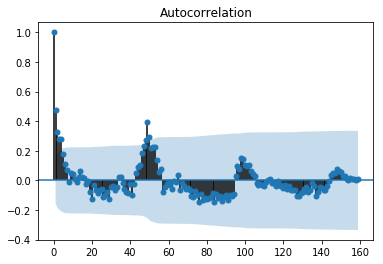

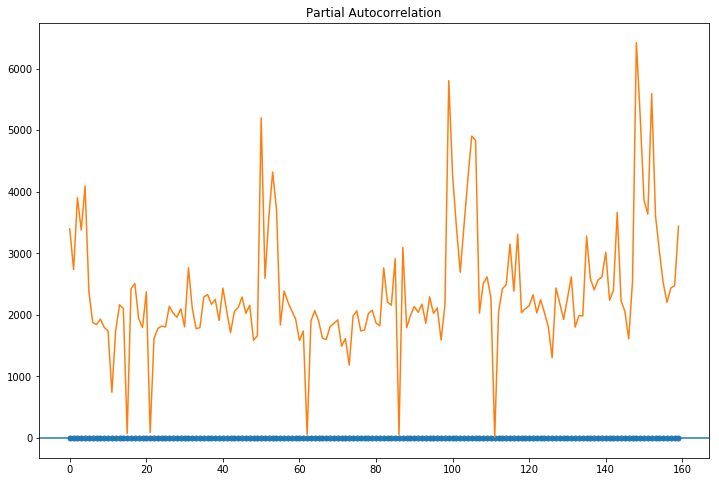

In [108]:

dta.plot(figsize=(12,8))
plt.show() 

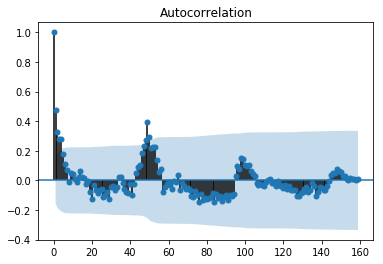

In [109]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
plot_acf(dta)

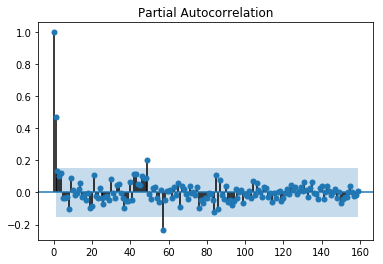

In [110]:
plot_pacf(dta)

In [111]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    dftest = adfuller(timeseries, autolag='AIC')
    return dftest[1]#返回p值
testADF=test_stationarity(dta)
testADF

0.0023526793754080301

In [112]:
t = sm.tsa.stattools.adfuller(dta)  # ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-3.85965
p-value,0.00235268
Lags Used,3
Number of Observations Used,156
Critical Value(1%),-3.47298
Critical Value(5%),-2.88025
Critical Value(10%),-2.57675


In [113]:
from statsmodels.stats.diagnostic import acorr_ljungbox
#返回统计量和p值
print(u'差分序列的白噪声检验结果为：', acorr_ljungbox(dta, lags=1))
p_value1=acorr_ljungbox(dta, lags=1)[1]

差分序列的白噪声检验结果为： (array([ 36.30176463]), array([  1.69010767e-09]))


In [114]:
if(p_value1<0.05):
    print('P值小于0.05，序列为平稳非白噪声序列')
else:
    print('P值大于等于0.05，序列为白噪声序列')

P值小于0.05，序列为平稳非白噪声序列


In [ ]:
#!usr/bin/env python
#-*- coding: utf-8 -*-
#回归base model初选

import sys
import os
import time
from sklearn import metrics
import numpy as np
from sklearn import model_selection
import datetime
import sklearn
import datetime


#reload(sys)
#sys.setdefaultencoding('utf8')


# KNN Classifier
def knn_Regressor(train_x, train_y):
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_jobs=-1)
    model.fit(train_x, train_y)
    return model


# Logistic Regression Classifier
def logistic_regression_Regressor(train_x, train_y):
    from sklearn.linear_model import LinearRegression
    model = LinearRegression(n_jobs=-1)
    model.fit(train_x, train_y)
    return model


# Random Forest Classifier
def random_forest_Regressor(train_x, train_y):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_jobs=-1)
    model.fit(train_x, train_y)
    return model


# Decision Tree Classifier
def decision_tree_Regressor(train_x, train_y):
    from sklearn import tree
    model = tree.DecisionTreeClassifier()
    model.fit(train_x, train_y)
    return model

# AdaBoostRegressor
def AdaBoostRegressor(train_x, train_y):
    from sklearn.ensemble import AdaBoostClassifier
    model = AdaBoostClassifier()
    model.fit(train_x, train_y)
    return model

# GBDT(Gradient Boosting Decision Tree) Regressor
def gradient_boosting_Regressor(train_x, train_y):
    from sklearn.ensemble import GradientBoostingClassifier
    model = GradientBoostingClassifier()
    model.fit(train_x, train_y)
    return model


# SVM Regressor
def svm_Regressor(train_x, train_y):
    from sklearn.svm import SVC
    model = SVC()
    model.fit(train_x, train_y)
    return model

def SGDRegressor(train_x, train_y):
    from sklearn.linear_model import SGDClassifier
    model = SGDClassifier(max_iter=5,tol=None)
    model.fit(train_x, train_y)
    return model
def XGBClassifier(train_x, train_y):
    from xgboost import XGBClassifier
    model = XGBClassifier(learning_rate=0.5)
    model.fit(train_x, train_y)
    return model

#分割数据集，生成测试和训练集
def read_data(df):
    data=df[['time','cha']]
    target=df['cnt']
    train_x, test_x, train_y, test_y= model_selection.train_test_split(data,target,test_size=0.28)
    return train_x, test_x, train_y, test_y,

if __name__ == '__main__':
    model_score={'KNN':0, 'LR':0, 'RF':0, 'DT':0, 'SVM':0, 'GBDT':0,'ADA':0,'SGD':0,'XGB':0}
    model_score2={'KNN':0, 'LR':0, 'RF':0, 'DT':0, 'SVM':0, 'GBDT':0,'ADA':0,'SGD':0,'XGB':0}
    test_Regressors = ['KNN', 'LR','RF', 'DT','SVM','GBDT','ADA','SGD','XGB']
    Regressors = {'LR':logistic_regression_Regressor,
   'RF':random_forest_Regressor,
   'DT':decision_tree_Regressor,
  'SVM':svm_Regressor,'SGD':SGDRegressor,'KNN':knn_Regressor,
 'GBDT':gradient_boosting_Regressor,'ADA':AdaBoostRegressor,'XGB':XGBClassifier
    }




    print('******************** Strating *********************')


    starttime = datetime.datetime.now()
    name=''
    temp=0
   
    for i in range(1,101):
        train_x, test_x, train_y, test_y = read_data(df)
        print(i)
        temp2=0
        #'model training and testing data...')
        for Regressor in test_Regressors:	
            #print('******************* %s ********************' % Regressor)	
            start_time = time.time()	
            model = Regressors[Regressor](train_x, train_y)	
            #print('training took %fs!' % (time.time() - start_time))	
            predict = model.predict(test_x)
            #p=predict.round(0)
            #模型拟合测试集
            from sklearn import metrics
            # 用scikit-learn计算MSE
            mse=metrics.mean_squared_error(test_y, predict)
            #print(mse)
            if(temp2==0):
                temp2=mse
            else:
                if(temp2>mse):
                    temp2=mse
                    model_score2[Regressor]=model_score2[Regressor]+1
            
            if(temp==0):
                temp=mse
                name=Regressor
                save_model=model
            else:
                if(temp>mse):
                    temp=mse
                    name=Regressor
                    model_score[Regressor]=model_score[Regressor]+1
                    save_model=model
        i=i+1

    endtime = datetime.datetime.now()
    print('training took %fs!' % (endtime - starttime).seconds)
    print('model name: %s' % name)
    print('lowestmse:%f'%temp)
    print('model_score')
    print(model_score)
    print('model_score2')
    print(model_score2)
    from sklearn.externals import joblib
    joblib.dump(save_model, dir+'my_model-week1.pkl')
    

******************** Strating *********************
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
